In [1447]:
from scipy.stats import norm
from random import uniform
import matplotlib.pyplot as plt
import numpy as np

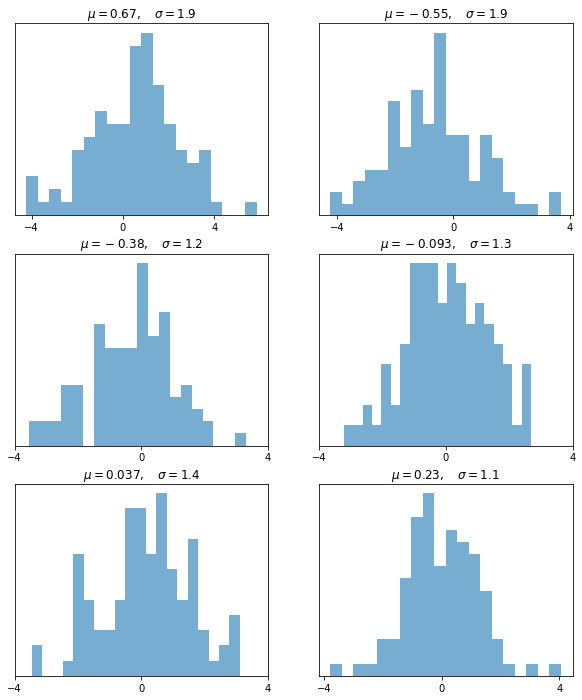

In [1448]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))  # Instantiate a 3x2 canvas (figure and axes objects)
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

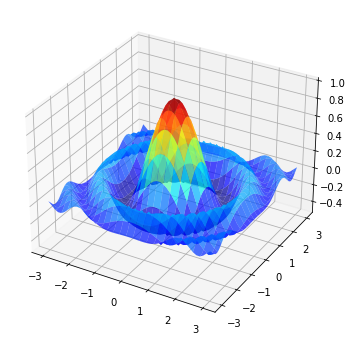

In [1449]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

In [1450]:
def draw_graphs(style='default'):

    # Setting a style sheet
    plt.style.use(style)

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    x = np.linspace(-13, 13, 150)

    # Set seed values to replicate results of random draws
    np.random.seed(9)

    for i in range(3):

        # Draw mean and standard deviation from uniform distributions
        m, s = np.random.uniform(-8, 8), np.random.uniform(2, 2.5)

        # Generate a normal density plot
        y = norm.pdf(x, loc=m, scale=s)
        axes[0].plot(x, y, linewidth=3, alpha=0.7)

        # Create a scatter plot with random X and Y values 
        # from normal distributions
        rnormX = norm.rvs(loc=m, scale=s, size=150)
        rnormY = norm.rvs(loc=m, scale=s, size=150)
        axes[1].plot(rnormX, rnormY, ls='none', marker='o', alpha=0.7)

        # Create a histogram with random X values
        axes[2].hist(rnormX, alpha=0.7)

        # and a line graph with random Y values
        axes[3].plot(x, rnormY, linewidth=2, alpha=0.7)

    style_name = style.split('-')[0]
    plt.suptitle(f'Style: {style_name}', fontsize=13)
    plt.show()

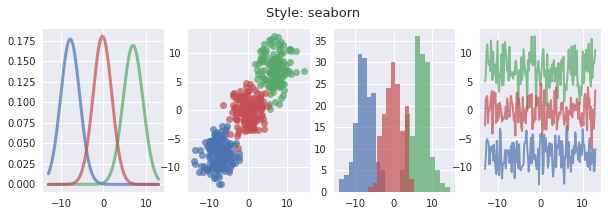

In [1451]:
draw_graphs(style="seaborn")

In [1452]:
# We can even create our own style by modifying plt.rcParams dict-like object.
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
          'axes.grid

In [1453]:
# Changing plt.rcParams values:

from cycler import cycler

# set to the default style sheet
plt.style.use('default')

# You can update single values using keys:

# Set the font style to italic
plt.rcParams['font.style'] = 'italic'

# Update linewidth
plt.rcParams['lines.linewidth'] = 2


# You can also update many values at once using the update() method:

parameters = {

    # Change default figure size
    'figure.figsize': (5, 4),

    # Add horizontal grid lines
    'axes.grid': True,
    'axes.grid.axis': 'y',

    # Update colors for density lines
    'axes.prop_cycle': cycler('color', 
                            ['dimgray', 'slategrey', 'darkgray'])
}

plt.rcParams.update(parameters)

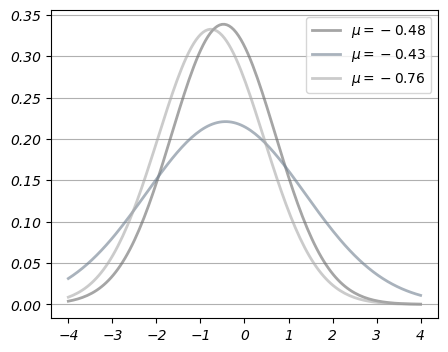

In [1454]:
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

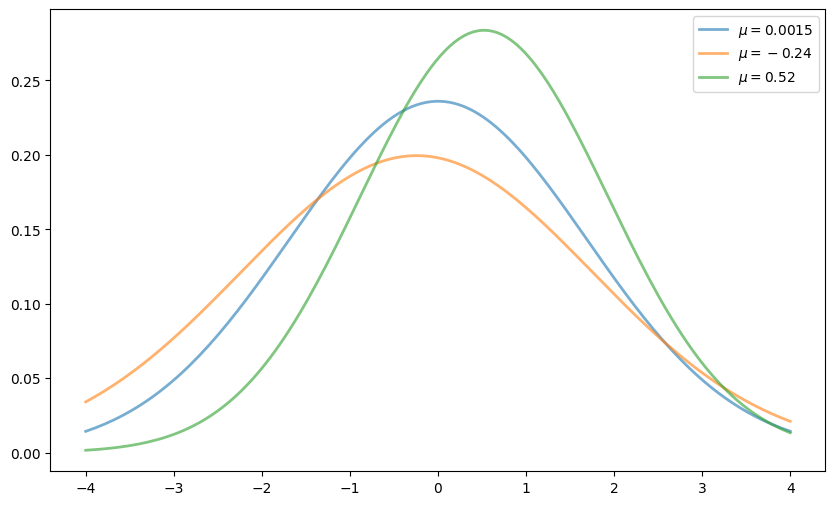

In [1455]:
# Undo the changes
plt.style.use('default')

# Reset default figure size
plt.rcParams['figure.figsize'] = (10, 6)

# Same code, now with different style
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

## Exercise 10.1 ##
Plot the function $ f(x) = \cos(\pi \theta x) \exp(-x) $

In [1456]:
def f(x_array, theta):
    """
    Args:
        x_array (numpy array): _description_
        theta (float): _description_
    
    Returns:
        (numpy array)
    """
    return np.cos(np.pi*theta*x_array) * np.exp(- x_array)

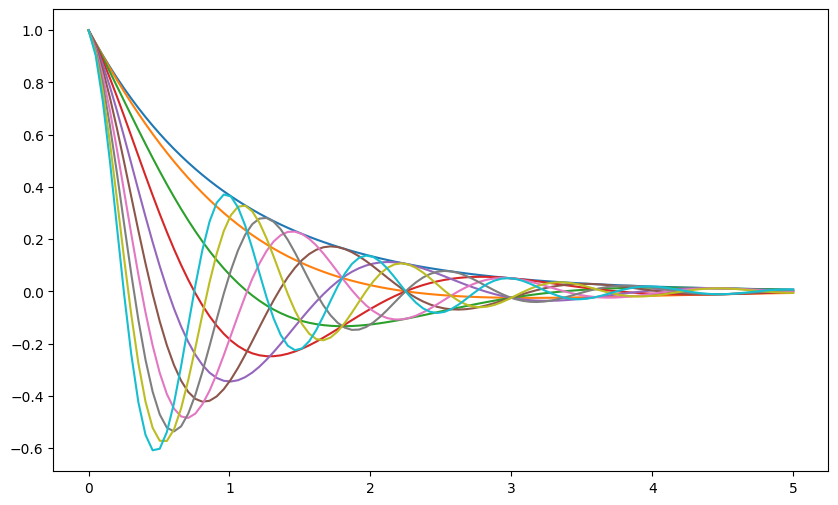

In [1457]:
theta_array = np.linspace(0, 2, 10)
x_array = np.linspace(0, 5, 100)

fig, ax = plt.subplots()
for theta in theta_array:
    ax.plot(x_array, f(x_array, theta))

# Pandas #

In [1458]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import requests

In [1459]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -0.901065
1    2.077388
2    0.609284
3   -0.863282
Name: daily returns, dtype: float64

In [1460]:
# Pandas Series are built on top of NumPy arrays and support many similar operations

print(s * 100)
print(np.abs(s))

0    -90.106527
1    207.738788
2     60.928380
3    -86.328219
Name: daily returns, dtype: float64
0    0.901065
1    2.077388
2    0.609284
3    0.863282
Name: daily returns, dtype: float64


In [1461]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
print(s)

AMZN   -0.901065
AAPL    2.077388
MSFT    0.609284
GOOG   -0.863282
Name: daily returns, dtype: float64


**Series are like fast, efficient Python dictionaries**

In [1462]:
print(s['AMZN'])
print("AAPL" in s)

-0.9010652711479537
True


In [1463]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
         country country isocode  year          POP       XRAT         tcgdp  \
0      Argentina             ARG  2000    37335.653   0.999500  2.950722e+05   
1      Australia             AUS  2000    19053.186   1.724830  5.418047e+05   
2          India             IND  2000  1006300.297  44.941600  1.728144e+06   
3         Israel             ISR  2000     6114.570   4.077330  1.292539e+05   
4         Malawi             MWI  2000    11801.505  59.543808  5.026222e+03   
5   South Africa             ZAF  2000    45064.098   6.939830  2.272424e+05   
6  United States             USA  2000   282171.957   1.000000  9.898700e+06   
7        Uruguay             URY  2000     3219.793  12.099592  2.525596e+04   

          cc         cg  
0  75.716805   5.578804  
1  67.759026   6.720098  
2  64.575551  14.072206  
3  64.436451  10.266688  
4  74.707624  11.658954  
5  72.718710   5.726546  
6  72.347054   6.032454  
7  78.978740   5.108068  


In [1464]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [1465]:
df[2:5][["country","cc", "cg"]]

,country,cc,cg
2,India,64.575551,14.072206
3,Israel,64.436451,10.266688
4,Malawi,74.707624,11.658954


In [1466]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


In [1467]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


### Select Data by Conditions ###

In [1468]:
df[df.POP >= 20000]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


In [1469]:
df.POP >= 20000

0     True
1    False
2     True
3    False
4    False
5     True
6     True
7    False
Name: POP, dtype: bool

In [1470]:
df[(df.country.isin(['Argentina', 'India', 'South Africa'])) & (df.POP > 40000)]
# This is equivalent to ...

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


In [1471]:
df.query("country in ['Argentina', 'India', 'South Africa'] and POP > 40000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


In [1472]:
df[(df.cc + df.cg >= 80) & (df.POP <= 20000)]
# This is equivalent to ...

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
4,Malawi,MWI,2000,11801.505,59.543808,5026.221784,74.707624,11.658954
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.978740,5.108068


In [1473]:
df.query("cc + cg >= 80 & POP <= 20000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
4,Malawi,MWI,2000,11801.505,59.543808,5026.221784,74.707624,11.658954
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.978740,5.108068


In [1474]:
df.loc[df.cc == max(df.cc)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.97874,5.108068


In [1475]:
# Now use .query to do that
df.query(f"cc == {max(df.cc)}")  # f strings are cool :)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.97874,5.108068


In [1476]:
# Now use .loc to do that and get only the country isocode and cc values
df.loc[df.cc == max(df.cc), ["country isocode", "cc"]]

,country isocode,cc
7,URY,78.97874


In [1477]:
df_subset = df[["country", "POP", "tcgdp"]]
df_subset

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [1478]:
df_subset.to_csv('pwt_subset.csv', index=False)

In [1479]:
temp = df[['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']].apply(max)  # max() function applied to all rows.
print(temp)
type(temp)

year     2.000000e+03
POP      1.006300e+06
XRAT     5.954381e+01
tcgdp    9.898700e+06
cc       7.897874e+01
cg       1.407221e+01
dtype: float64


pandas.core.series.Series

For the .apply() method

* axis = 0 – apply function to each column (variables)

* axis = 1 – apply function to each row (observations)

* axis = 0 is the default parameter

In [1480]:
df.where(df.POP >= 20000, False)  # keep the rows where the condition is True, change the rows with the second argument where the condition is False.

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.9995,295072.21869,75.716805,5.578804
1,False,False,False,False,False,False,False,False
2,India,IND,2000,1006300.297,44.9416,1728144.3748,64.575551,14.072206
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,South Africa,ZAF,2000,45064.098,6.93983,227242.36949,72.71871,5.726546
6,United States,USA,2000,282171.957,1.0,9898700.0,72.347054,6.032454
7,False,False,False,False,False,False,False,False


In [1481]:
# Here we are MUTATING the dataframe
df.loc[df.cg == max(df.cg), 'cg'] = np.nan
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [1482]:
# Write a function that changes POP values, as a key to apply():
# if POP < 10000: LOW POP
# if 10000 <= POP <= 100000. MID POP
# if POP > 100000: HIGH POP

def mutatePop(row):
    if row.POP < 10000:
        row.POP = "LOW POP"
    elif 10000 <= row.POP <= 100000:
        row.POP = "MID POP"
    else:
        row.POP = "HIGH POP"
    
    return row

df.apply(mutatePop, axis=1)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,MID POP,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,MID POP,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,HIGH POP,44.941600,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000,LOW POP,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,MID POP,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,MID POP,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,HIGH POP,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,LOW POP,12.099592,2.525596e+04,78.978740,5.108068


In [1483]:
# Round all decimal numbers to 2 decimal places
df.applymap(lambda x : round(x,2) if type(x)!=str else x)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.65,1.00,295072.22,75.72,5.58
1,Australia,AUS,2000,19053.19,1.72,541804.65,67.76,6.72
2,India,IND,2000,1006300.30,44.94,1728144.37,64.58,NaN
3,Israel,ISR,2000,6114.57,4.08,129253.89,64.44,10.27
4,Malawi,MWI,2000,11801.50,59.54,5026.22,74.71,11.66
5,South Africa,ZAF,2000,45064.10,6.94,227242.37,72.72,5.73
6,United States,USA,2000,282171.96,1.00,9898700.00,72.35,6.03
7,Uruguay,URY,2000,3219.79,12.10,25255.96,78.98,5.11


* apply(): Apply a function to **column vectors** *(axis=0)* or **row vectors** *(axis=1)*
* applymap(): Apply a function to **all individual elements** of the dataframe

## Missing Values ##

In [1484]:
for idx in list(zip([0, 3, 5, 6], [3, 4, 6, 2])):
    df.iloc[idx] = np.nan

df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,NaN,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1006300.297,44.941600,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000.0,6114.570,NaN,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,45064.098,6.939830,2.272424e+05,NaN,5.726546
6,United States,USA,NaN,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [1485]:
# replace all NaN values by 0
def replace_nan(x):
    if type(x)!=str:  # if type of x is not string ...
        return 0 if np.isnan(x) else x  # ... if x is NaN change it to 0, otherwise leave it the same
    else:
        return x

df.applymap(replace_nan)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,0.000,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1006300.297,44.941600,1.728144e+06,64.575551,0.000000
3,Israel,ISR,2000.0,6114.570,0.000000,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,45064.098,6.939830,2.272424e+05,0.000000,5.726546
6,United States,USA,0.0,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [1486]:
# or we can fill missing values by just averaging other values:
df.fillna(value=df.iloc[:, 2:8].mean())

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,1.962465e+05,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,1.905319e+04,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1.006300e+06,44.941600,1.728144e+06,64.575551,7.298802
3,Israel,ISR,2000.0,6.114570e+03,18.178451,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,1.180150e+04,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,4.506410e+04,6.939830,2.272424e+05,71.217322,5.726546
6,United States,USA,2000.0,2.821720e+05,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3.219793e+03,12.099592,2.525596e+04,78.978740,5.108068


In [1487]:
# now do the same with .loc
df = df.fillna(value=df.loc[:, ["year", "POP", "XRAT", "tcgdp", "cc", "cg"]].mean())
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,1.962465e+05,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,1.905319e+04,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1.006300e+06,44.941600,1.728144e+06,64.575551,7.298802
3,Israel,ISR,2000.0,6.114570e+03,18.178451,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,1.180150e+04,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,4.506410e+04,6.939830,2.272424e+05,71.217322,5.726546
6,United States,USA,2000.0,2.821720e+05,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3.219793e+03,12.099592,2.525596e+04,78.978740,5.108068


## Changing Index ##

In [1488]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,1.962465e+05,2.950722e+05
1,Australia,1.905319e+04,5.418047e+05
2,India,1.006300e+06,1.728144e+06
3,Israel,6.114570e+03,1.292539e+05
4,Malawi,1.180150e+04,5.026222e+03
5,South Africa,4.506410e+04,2.272424e+05
6,United States,2.821720e+05,9.898700e+06
7,Uruguay,3.219793e+03,2.525596e+04


In [1489]:
# change index to country values:
df = df.set_index("country")
df

,POP,tcgdp
country,,
Argentina,1.962465e+05,2.950722e+05
Australia,1.905319e+04,5.418047e+05
India,1.006300e+06,1.728144e+06
Israel,6.114570e+03,1.292539e+05
Malawi,1.180150e+04,5.026222e+03
South Africa,4.506410e+04,2.272424e+05
United States,2.821720e+05,9.898700e+06
Uruguay,3.219793e+03,2.525596e+04


In [1490]:
df.columns = ["population", "total GDP"]  # MUTATES the columns
df

,population,total GDP
country,,
Argentina,1.962465e+05,2.950722e+05
Australia,1.905319e+04,5.418047e+05
India,1.006300e+06,1.728144e+06
Israel,6.114570e+03,1.292539e+05
Malawi,1.180150e+04,5.026222e+03
South Africa,4.506410e+04,2.272424e+05
United States,2.821720e+05,9.898700e+06
Uruguay,3.219793e+03,2.525596e+04


In [1491]:
# convert population from thousands to regular number
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,1.962465e+08,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [1492]:
# calculate GDP per capita
df['GDP percap'] = df['total GDP'] * 1e+6 / df['population']  # we multiply total gdp by 1e6 to convert it from millons $ to $
df

,population,total GDP,GDP percap
country,,,
Argentina,1.962465e+08,2.950722e+05,1503.579625
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


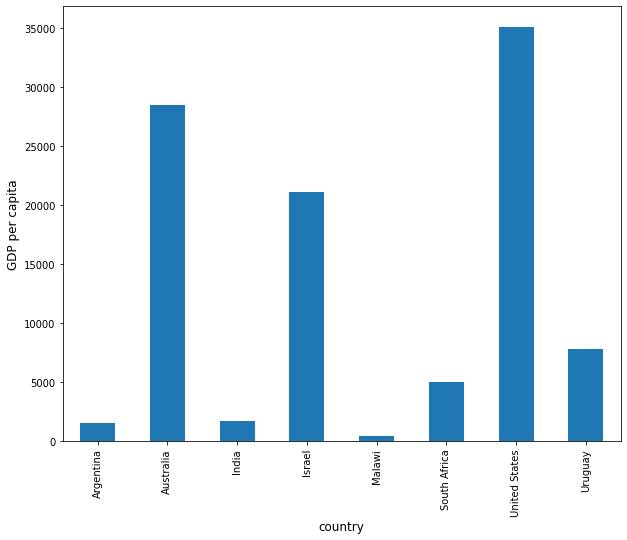

In [1493]:
# we can use plot methods directly on dataframes or series. Very convenient.
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [1494]:
# Sort values by GDP per capita, descending order
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Argentina,1.962465e+08,2.950722e+05,1503.579625
Malawi,1.180150e+07,5.026222e+03,425.896679


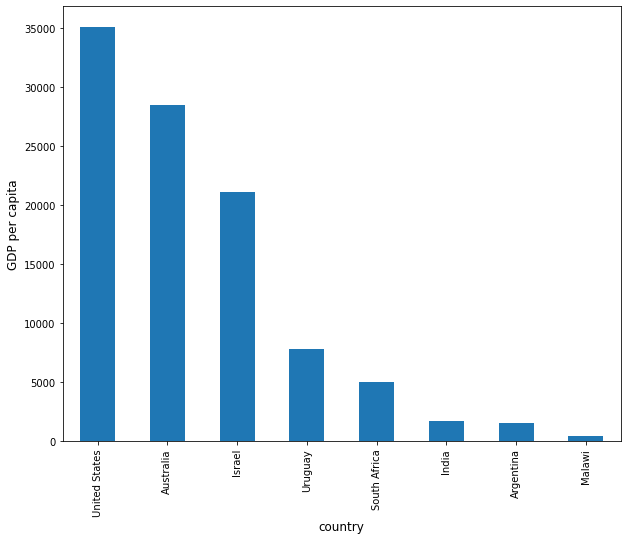

In [1495]:
# ... and plot again
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

## Using **requests** to get data from the internet ##

In [1496]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')  # get unemployment data
type(r)

requests.models.Response

In [1497]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")  # decode and split the lines
source[0]

'DATE,VALUE\r'

In [1498]:
source[1]

'1948-01-01,3.4\r'

We can parse this text with additional code, but instead let's use pandas *read_csv()* function:

In [1499]:
data = pd.read_csv(url, index_col=0, parse_dates=True)
data.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [1500]:
print(data.index[:])
print(type(data.index[:]))  # type is datetime index because we used parse_dates=True argument in .read_csv() function.

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='DATE', length=908, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [1501]:
data.describe()  # Your output might differ slightly

,VALUE
count,908.000000
mean,5.713767
std,1.707884
min,2.500000
25%,4.400000
50%,5.500000
75%,6.725000
max,14.700000


In [1502]:
# slice data from year 2006 to 2012
data['2006':'2012']

,VALUE
DATE,
2006-01-01,4.7
2006-02-01,4.8
2006-03-01,4.7
2006-04-01,4.7
2006-05-01,4.6
...,...
2012-08-01,8.1
2012-09-01,7.8
2012-10-01,7.8


In [1503]:
# now do that with conditionals
data[("2006-01-01" <= data.index) & (data.index <= "2012-01-01")]

,VALUE
DATE,
2006-01-01,4.7
2006-02-01,4.8
2006-03-01,4.7
2006-04-01,4.7
2006-05-01,4.6
...,...
2011-09-01,9.0
2011-10-01,8.8
2011-11-01,8.6


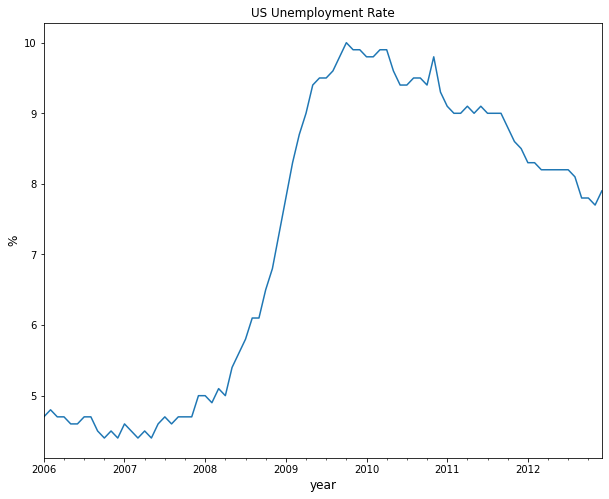

In [1504]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

## pandas_datareader and yfinance ##

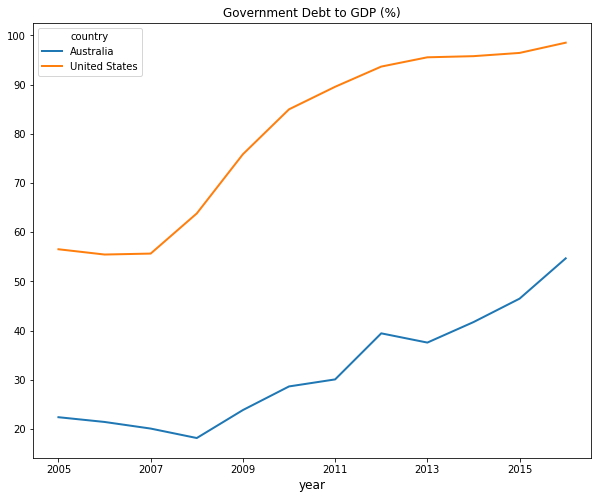

In [1505]:
from pandas_datareader import wb

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

Exercise 12.1: Write a program to calculate the percentage price change over 2021 for the following shares:

In [1506]:
import datetime as dt
import yfinance as yf

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'C': 'Citigroup',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google'}

In [1507]:
df = yf.download(list(ticker_list.keys()), "2021-01-01", "2022-01-01")["Adj Close"]
df = df.rename(columns=ticker_list)
df.head()

[*********************100%%**********************]  11 of 11 completed


,Apple,Amazon,BHP,Citigroup,Google,IBM,Intel,Coca-Cola,Microsoft,Qualcomm,Toyota
Date,,,,,,,,,,,
2021-01-04,127.331696,159.331497,54.710884,54.322041,86.412003,103.558601,45.653938,48.541878,212.426895,139.894745,153.289993
2021-01-05,128.905975,160.925507,56.457409,55.731121,87.045998,105.396820,46.517937,48.008251,212.631790,143.597015,153.399994
2021-01-06,124.566818,156.919006,58.252674,58.937695,86.764503,108.028824,46.968319,46.480968,207.118408,142.428864,153.529999
2021-01-07,128.817444,158.108002,59.446812,59.633198,89.362503,107.778160,47.970184,45.965740,213.012390,146.677505,152.669998
2021-01-08,129.929276,159.134995,59.674267,59.046082,90.360497,107.393806,47.473850,46.996201,214.310226,147.563034,152.850006


In [1508]:
type(df.index)  # index is already datetime.

pandas.core.indexes.datetimes.DatetimeIndex

In [1509]:
returns = df.pct_change()
returns = returns.dropna()
returns.head()

,Apple,Amazon,BHP,Citigroup,Google,IBM,Intel,Coca-Cola,Microsoft,Qualcomm,Toyota
Date,,,,,,,,,,,
2021-01-05,0.012364,0.010004,0.031923,0.025939,0.007337,0.017751,0.018925,-0.010993,0.000965,0.026465,0.000718
2021-01-06,-0.033661,-0.024897,0.031799,0.057536,-0.003234,0.024972,0.009682,-0.031813,-0.025929,-0.008135,0.000847
2021-01-07,0.034123,0.007577,0.020499,0.011801,0.029943,-0.002320,0.021331,-0.011085,0.028457,0.029830,-0.005602
2021-01-08,0.008631,0.006496,0.003826,-0.009845,0.011168,-0.003566,-0.010347,0.022418,0.006093,0.006037,0.001179
2021-01-11,-0.023249,-0.021519,-0.029676,0.016368,-0.022405,0.000389,-0.002130,-0.017228,-0.009698,-0.003383,0.003533


In [1510]:
sum_returns = returns.apply(sum, axis = 0)
print(sum_returns)
print("type =", type(sum_returns))

Apple        0.353764
Amazon       0.074083
BHP         -0.055686
Citigroup    0.066799
Google       0.543635
IBM          0.196159
Intel        0.111702
Coca-Cola    0.157244
Microsoft    0.465497
Qualcomm     0.284148
Toyota       0.213002
dtype: float64
type = <class 'pandas.core.series.Series'>


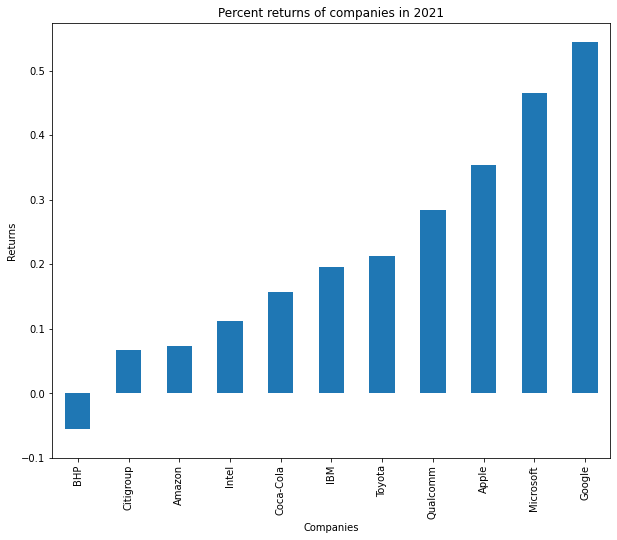

In [1511]:
sum_returns = sum_returns.sort_values(ascending=True)
ax = sum_returns.plot(kind="bar")
ax.set_xlabel("Companies")
ax.set_ylabel("Returns")
ax.set_title("Percent returns of companies in 2021")
ax.set_yticks(np.linspace(-0.1, 0.5, 7))

### Exercise 12.2 ###

In [1512]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

In [1513]:
df = yf.download(list(indices_list.keys()), interval="1mo")["Adj Close"]
df = df.rename(columns=indices_list)
df

[*********************100%%**********************]  4 of 4 completed


,Dow Jones,S&P 500,NASDAQ,Nikkei
Date,,,,
1985-01-01,NaN,179.630005,278.700012,11992.309570
1985-02-01,NaN,181.179993,284.200012,12321.919922
1985-03-01,NaN,180.660004,279.200012,12580.759766
1985-04-01,NaN,179.830002,280.600006,12426.290039
1985-05-01,NaN,189.550003,290.799988,12758.459961
...,...,...,...,...
2023-05-01,32908.269531,4179.830078,12935.290039,30887.880859
2023-06-01,34407.601562,4450.379883,13787.919922,33189.039062
2023-07-01,35559.531250,4588.959961,14346.019531,33172.218750


In [1514]:
returns = df.pct_change()
returns

,Dow Jones,S&P 500,NASDAQ,Nikkei
Date,,,,
1985-01-01,NaN,NaN,NaN,NaN
1985-02-01,NaN,0.008629,0.019734,0.027485
1985-03-01,NaN,-0.002870,-0.017593,0.021006
1985-04-01,NaN,-0.004594,0.005014,-0.012278
1985-05-01,NaN,0.054051,0.036351,0.026731
...,...,...,...,...
2023-05-01,-0.034896,0.002482,0.057965,0.070398
2023-06-01,0.045561,0.064727,0.065915,0.074500
2023-07-01,0.033479,0.031139,0.040477,-0.000507


In [1515]:
returns.index = returns.index.year
returns

,Dow Jones,S&P 500,NASDAQ,Nikkei
Date,,,,
1985,NaN,NaN,NaN,NaN
1985,NaN,0.008629,0.019734,0.027485
1985,NaN,-0.002870,-0.017593,0.021006
1985,NaN,-0.004594,0.005014,-0.012278
1985,NaN,0.054051,0.036351,0.026731
...,...,...,...,...
2023,-0.034896,0.002482,0.057965,0.070398
2023,0.045561,0.064727,0.065915,0.074500
2023,0.033479,0.031139,0.040477,-0.000507


In [1516]:
yoy_returns = returns.groupby(level=0).sum()
yoy_returns

,Dow Jones,S&P 500,NASDAQ,Nikkei
Date,,,,
1985,0.000000,0.168415,0.160640,0.090765
1986,0.000000,0.151830,0.084914,0.380691
1987,0.000000,0.066477,0.009316,0.161330
1988,0.000000,0.122242,0.150646,0.346628
1989,0.000000,0.250405,0.182152,0.262246
1990,0.000000,-0.052465,-0.165873,-0.406323
1991,0.000000,0.246917,0.474790,-0.010481
1992,0.012752,0.046289,0.154176,-0.271518
1993,0.131012,0.069973,0.144624,0.061694


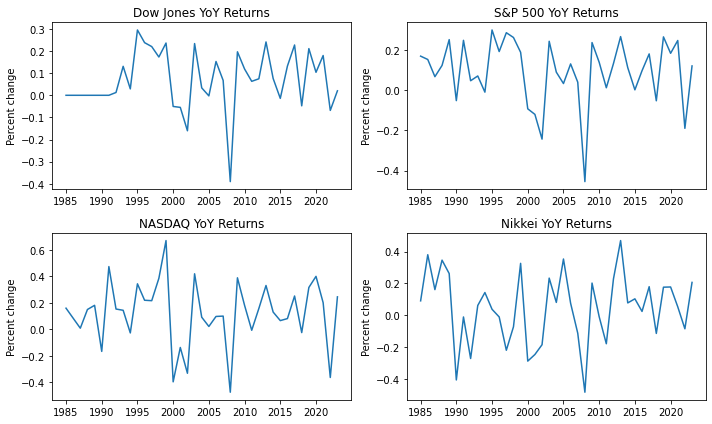

In [1517]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for idx, col in enumerate(yoy_returns.columns):
    x = 0 if idx <= 1 else 1
    axs[x, idx%2].plot(yoy_returns.iloc[:, idx])
    axs[x, idx%2].set_title(f"{col} YoY Returns")
    axs[x, idx%2].set_ylabel("Percent change")
plt.tight_layout()

In [1518]:
import matplotlib.patches as mpatches
import pandas as pd
from matplotlib import pyplot as plt
from optionprice import Option

In [1519]:
myCall = Option(european=True, kind="call", s0=100, k=100, t=30, sigma=0.20, r=0.05, dv=0)
print(myCall)
print("price of the option =", myCall.getPrice().round(3))

Type:           European
Kind:           call
Price initial:  100
Price strike:   100
Volatility:     20.0%
Risk free rate: 5.0%
Start Date:     2023-09-29
Expire Date:    2023-10-29
Time span:      30 days
price of the option = 2.493


In [1520]:
df = pd.DataFrame(columns=["Stock", "Option"])  # create an empty dataframe with proper columns
df

,Stock,Option


In [1521]:
def CallOptionVsStock(S, k=100, t=30, sigma=0.20, r=0.05, dv=0):
    myCall = Option(True, "call", S, k, r, sigma, dv, t)
    return myCall.getPrice()

In [1522]:
def getCallPayoff(S, K=100):
    if S > K:
        return S - K
    return 0

def addCallPayoff(K, rng=21):
    stockP = range(K - rng, K + rng)
    OptionP = list(map(getCallPayoff, stockP))
    plt.plot(stockP, OptionP, linestyle="dotted", label="Option payoff at expiration")
    
    
    return 

In [1523]:
StockPrices = list(range(80, 120))
OptionPrices = list(map(CallOptionVsStock, StockPrices))

print(StockPrices)
print(np.round(OptionPrices, 3))

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
[0.0000e+00 0.0000e+00 0.0000e+00 1.0000e-03 2.0000e-03 5.0000e-03
 9.0000e-03 1.7000e-02 3.0000e-02 5.1000e-02 8.4000e-02 1.3500e-01
 2.0900e-01 3.1300e-01 4.5600e-01 6.4400e-01 8.8500e-01 1.1860e+00
 1.5530e+00 1.9880e+00 2.4930e+00 3.0680e+00 3.7080e+00 4.4100e+00
 5.1680e+00 5.9750e+00 6.8240e+00 7.7080e+00 8.6220e+00 9.5570e+00
 1.0511e+01 1.1478e+01 1.2455e+01 1.3440e+01 1.4429e+01 1.5422e+01
 1.6418e+01 1.7415e+01 1.8413e+01 1.9412e+01]


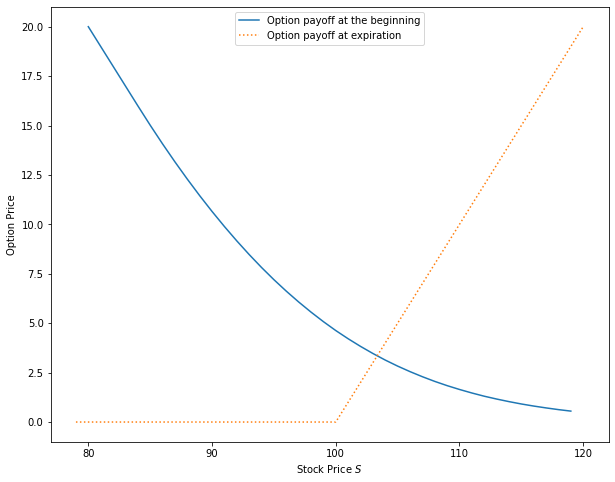

In [1532]:
plt.plot(StockPrices, OptionPrices, label="Option payoff at the beginning")
addCallPayoff(100)
plt.xlabel("Stock Price $S$")
plt.ylabel("Option Price")
plt.legend()

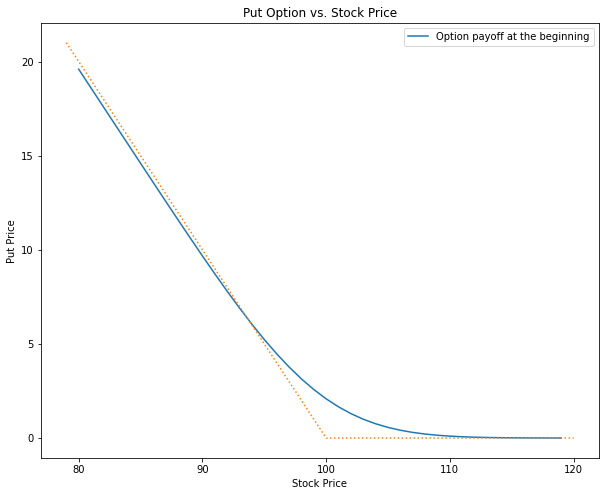

In [1525]:
def PutOptionVsStock(S, k=100, t=30, sigma=0.20, r=0.05, dv=0):
    myPut = Option(s0=S, european=True, kind="put", k=k, t=t, sigma=sigma, r=r, dv=0)
    return myPut.getPrice()


def getPutPayoff(S, K=100):
    if S < K:
        return K - S
    return 0


def addPutPayoff(K, rng=21):
    stockP = range(K - 21, K + 21)
    optionP = list(map(getPutPayoff, stockP))
    plt.plot(stockP, optionP, linestyle="dotted", label="Option payoff at expiration")
    
StockPrices = list(range(80, 120))
OptionPrices = list(map(PutOptionVsStock, StockPrices))

plt.plot(StockPrices, OptionPrices, label="Option payobff at the beginning")
plt.title("Put Option vs. Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Put Price")
plt.legend()
addPutPayoff(100)

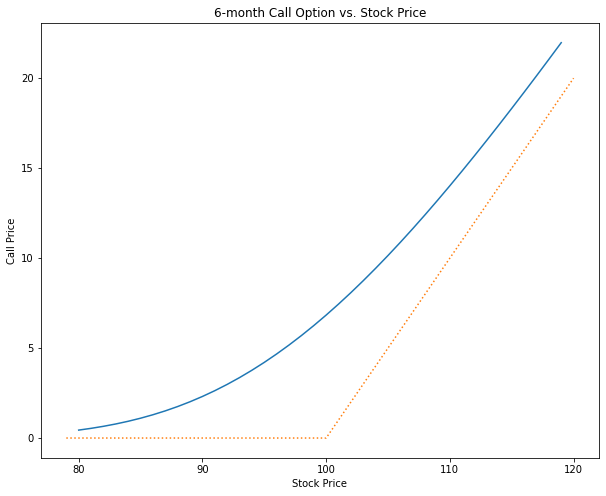

In [1526]:
def CallOptionVsStock(S, k=100, t=180, sigma=0.20, r=0.05, dv=0):
    myCall = Option(european=True, kind="call", s0=S, k=k, t=t, sigma=sigma, r=r, dv=0)
    return myCall.getPrice()


OptionPrices = list(map(CallOptionVsStock, StockPrices))  # map the function to stock prices element-wise.
plt.plot(StockPrices, OptionPrices)
plt.title("6-month Call Option vs. Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Call Price")
addCallPayoff(100)

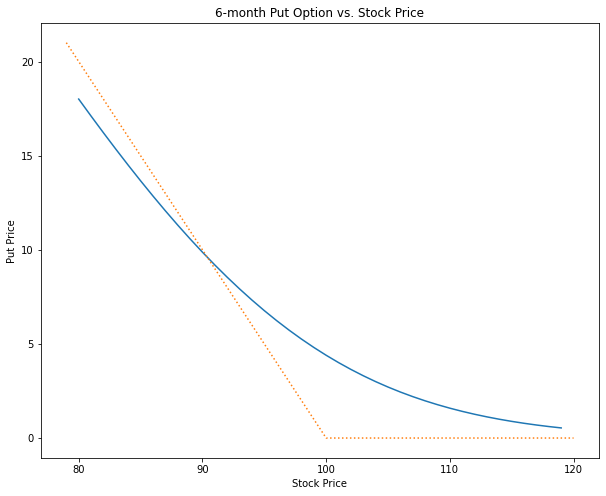

In [1527]:
def PutOptionVsStock(S, k=100, t=180, sigma=0.20, r=0.05, dv=0):
    myPut = Option(european=True, kind="put", s0=S, k=k, t=t, sigma=sigma, r=r, dv=0)
    return myPut.getPrice()

OptionPrices = list(map(PutOptionVsStock, StockPrices))
plt.plot(StockPrices, OptionPrices)
plt.title("6-month Put Option vs. Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Put Price")
addPutPayoff(100)

## Difference between European and American Put Options ##

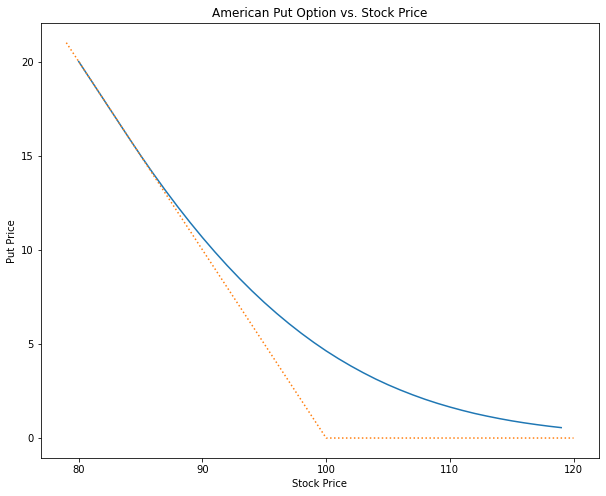

In [1529]:
def AmericanPutOptionVsStock(S, k=100, t=180, sigma=0.20, r=0.05, dv=0):
    myPut = Option(european=False, kind="put", s0=S, k=k, t=t, sigma=sigma, r=r, dv=0)
    return myPut.getPrice(method="BT", iteration=500)


OptionPrices = list(map(AmericanPutOptionVsStock, StockPrices))

# Graph the American option
plt.plot(StockPrices, OptionPrices)
plt.title("American Put Option vs. Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Put Price")
addPutPayoff(100)

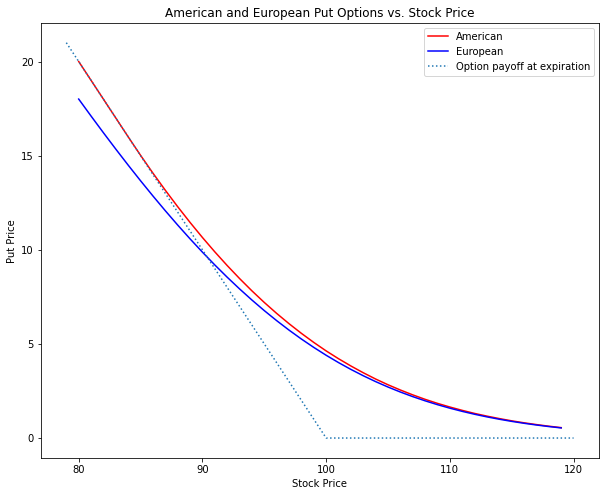

In [1531]:
# Graph the American option
AmericanOptionPrices = list(map(AmericanPutOptionVsStock, StockPrices))
plt.plot(StockPrices, AmericanOptionPrices, label="American", c="r")

# Graph the European option
EuropeanOptionPrices = list(map(PutOptionVsStock, StockPrices))
plt.plot(StockPrices, EuropeanOptionPrices, label="European", c="b")

# Add titles, payoff, labels and a legend
plt.title("American and European Put Options vs. Stock Price")
addPutPayoff(100)
plt.xlabel("Stock Price")
plt.ylabel("Put Price")
plt.legend()

## Option Prices for Different Strike Levels ##

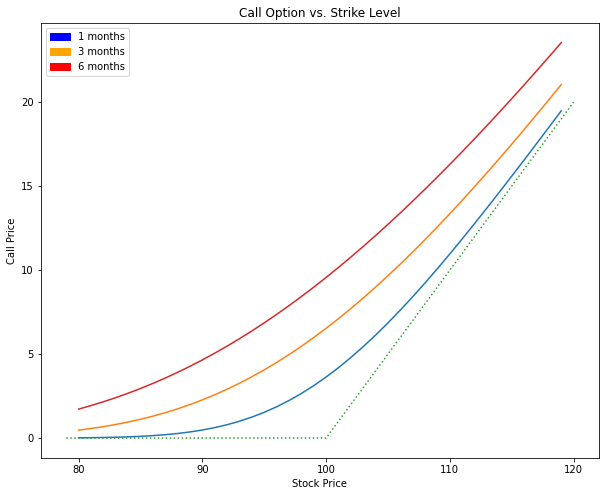

In [1533]:
StockPrices = list(range(80, 120))


def CallOptionVsStock(S, k=100, t=30, sigma=0.30, r=0.05, dv=0):
    myCall = Option(european=True, kind="call", s0=S, k=k, t=t, sigma=sigma, r=r, dv=0)
    return myCall.getPrice()


OptionPrices = list(map(CallOptionVsStock, StockPrices))
plt.plot(StockPrices, OptionPrices)
plt.title("Call Option vs. Strike Level")
plt.xlabel("Stock Price")
plt.ylabel("Call Price")


def CallOptionVsStock(S, k=100, t=90, sigma=0.30, r=0.05, dv=0):
    myCall = Option(european=True, kind="call", s0=S, k=k, t=t, sigma=sigma, r=r, dv=0)
    return myCall.getPrice()


OptionPrices = list(map(CallOptionVsStock, StockPrices))
plt.plot(StockPrices, OptionPrices)
addCallPayoff(100)


def CallOptionVsStock(S, k=100, t=180, sigma=0.30, r=0.05, dv=0):
    myCall = Option(european=True, kind="call", s0=S, k=k, t=t, sigma=sigma, r=r, dv=0)
    return myCall.getPrice()


OptionPrices = list(map(CallOptionVsStock, StockPrices))
plt.plot(StockPrices, OptionPrices)
patch1 = mpatches.Patch(color="blue", label="1 months")
patch2 = mpatches.Patch(color="orange", label="3 months")
patch3 = mpatches.Patch(color="red", label="6 months")
plt.legend(handles=[patch1, patch2, patch3]);

## Option Prices for Different Expirations ##

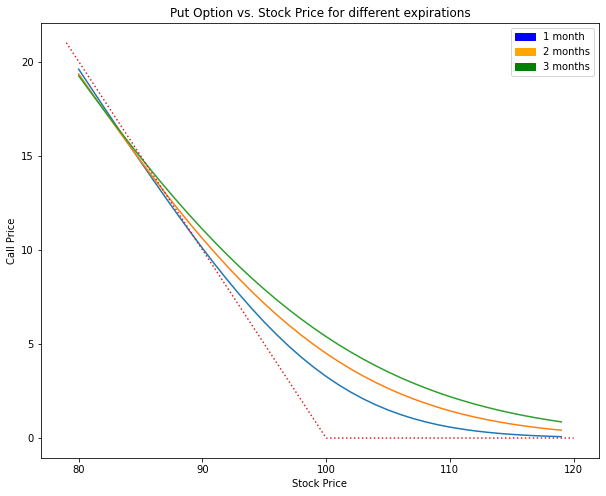

In [1534]:
StockPrices = list(range(80, 120))


def PutOptionVsStock(S, k=100, t=31, sigma=0.30, r=0.05, dv=0):
    myCall = Option(european=True, kind="put", s0=S, k=k, t=t, sigma=sigma, r=r, dv=0)
    return myCall.getPrice()


plt.plot(StockPrices, list(map(PutOptionVsStock, StockPrices)))
plt.title("Put Option vs. Stock Price for different expirations")
plt.xlabel("Stock Price")
plt.ylabel("Call Price")


def PutOptionVsStock(S, k=100, t=62, sigma=0.30, r=0.05, dv=0):
    myCall = Option(european=True, kind="put", s0=S, k=k, t=t, sigma=sigma, r=r, dv=0)
    return myCall.getPrice()


plt.plot(StockPrices, list(map(PutOptionVsStock, StockPrices)))


def PutOptionVsStock(S, k=100, t=93, sigma=0.30, r=0.05, dv=0):
    myCall = Option(european=True, kind="put", s0=S, k=k, t=t, sigma=sigma, r=r, dv=0)
    return myCall.getPrice()


plt.plot(StockPrices, list(map(PutOptionVsStock, StockPrices)))
addPutPayoff(100)
patch1 = mpatches.Patch(color="blue", label="1 month")
patch2 = mpatches.Patch(color="orange", label="2 months")
patch3 = mpatches.Patch(color="green", label="3 months")
plt.legend(handles=[patch1, patch2, patch3]);

## Option Prices for Different Volatilities ##

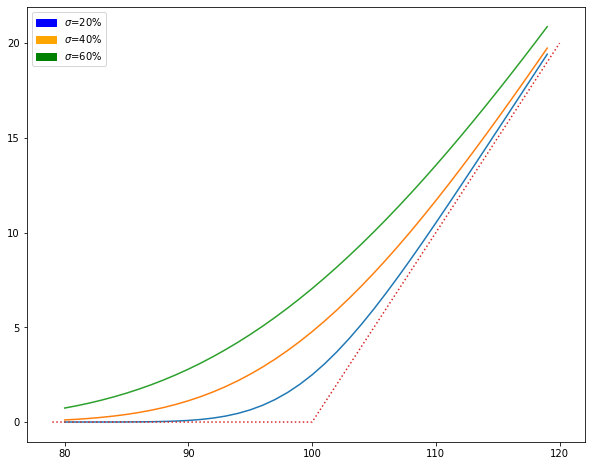

In [1535]:
def CallOptionVsStock(S, sigma, k=100, t=30, r=0.05, dv=0):
    myCall = Option(s0=S, sigma=sigma, european=True, kind="call", k=k, t=t, r=r, dv=0)
    return myCall.getPrice()


for i in range(1, 4):
    sigmas = [0.20 * i] * len(StockPrices)
    OptionPrices = list(map(CallOptionVsStock, StockPrices, sigmas))
    plt.plot(StockPrices, OptionPrices)

patch1 = mpatches.Patch(color="blue", label=r"$\sigma$=20%")
patch2 = mpatches.Patch(color="orange", label=r"$\sigma$=40%")
patch3 = mpatches.Patch(color="green", label=r"$\sigma$=60%")
plt.legend(handles=[patch1, patch2, patch3])
addCallPayoff(100)

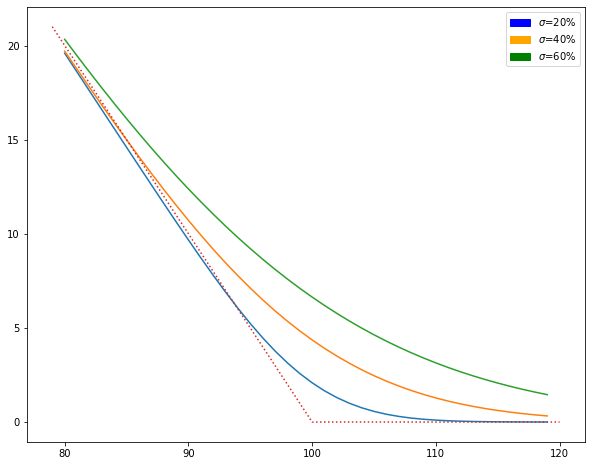

In [1536]:
def PutOptionVsStock(S, sigma, k=100, t=30, r=0.05, dv=0):
    myPut = Option(s0=S, sigma=sigma, european=True, kind="put", k=k, t=t, r=r, dv=0)
    return myPut.getPrice()


for i in range(1, 4):
    sigmas = [0.20 * i] * len(StockPrices)
    OptionPrices = list(map(PutOptionVsStock, StockPrices, sigmas))
    plt.plot(StockPrices, OptionPrices)

patch1 = mpatches.Patch(color="blue", label=r"$\sigma$=20%")
patch2 = mpatches.Patch(color="orange", label=r"$\sigma$=40%")
patch3 = mpatches.Patch(color="green", label=r"$\sigma$=60%")
plt.legend(handles=[patch1, patch2, patch3])
addPutPayoff(100)

## Option Prices for Different Interest Rates ##

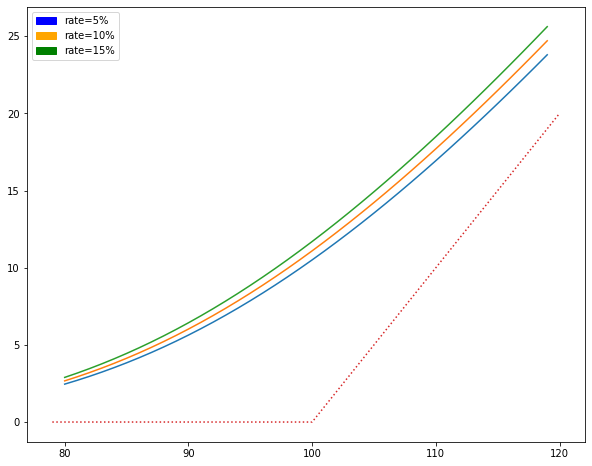

In [1539]:
def CallOptionVsStock(S, r, k=100, t=91, sigma=0.50, dv=0):
    myCall = Option(s0=S, r=r, sigma=sigma, european=True, kind="call", k=k, t=t, dv=0)
    return myCall.getPrice()


for i in range(1, 4):
    rates = [0.05 * i] * len(StockPrices)
    OptionPrices = list(map(CallOptionVsStock, StockPrices, rates))
    plt.plot(StockPrices, OptionPrices)

patch1 = mpatches.Patch(color="blue", label="rate=5%")
patch2 = mpatches.Patch(color="orange", label="rate=10%")
patch3 = mpatches.Patch(color="green", label="rate=15%")
plt.legend(handles=[patch1, patch2, patch3])
addCallPayoff(100)

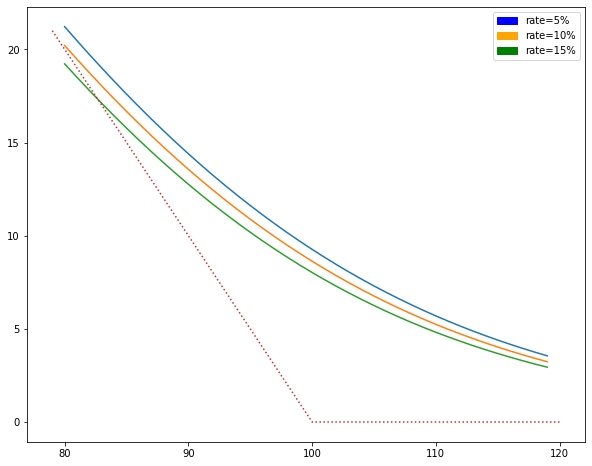

In [1540]:
def PutOptionVsStock(S, r, k=100, t=91, sigma=0.50, dv=0):
    myPut = Option(s0=S, r=r, sigma=sigma, european=True, kind="put", k=k, t=t, dv=0)
    return myPut.getPrice()


for i in range(1, 4):
    rates = [0.05 * i] * len(StockPrices)
    OptionPrices = list(map(PutOptionVsStock, StockPrices, rates))
    plt.plot(StockPrices, OptionPrices)

patch1 = mpatches.Patch(color="blue", label="rate=5%")
patch2 = mpatches.Patch(color="orange", label="rate=10%")
patch3 = mpatches.Patch(color="green", label="rate=15%")
plt.legend(handles=[patch1, patch2, patch3])
addPutPayoff(100)